# Time Series Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Manipulating Time Series Data in Python

### 1.1 Working with Time Series

In [3]:
#Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

#Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [4]:
google = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv')
google.head(1)

,Date,Close
0,2014-01-02,556.0


In [5]:
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [6]:
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


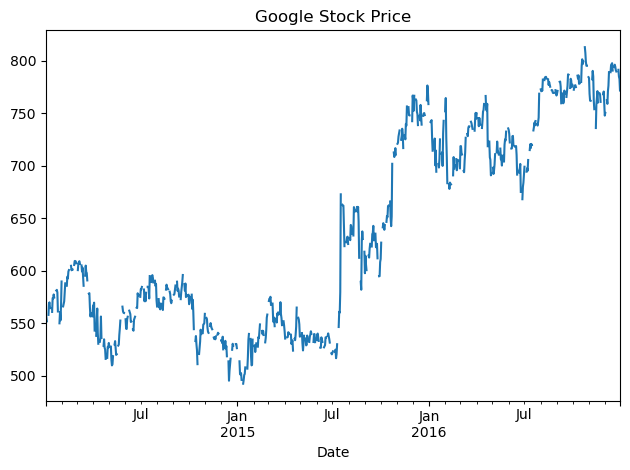

In [15]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

In [21]:
#Indexing
google['2015'][:5]

C:\Users\M0201420\AppData\Local\Temp\ipykernel_21168\2796543237.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'][:5]


,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87


In [24]:
google.loc['2015-1-2','Close']

524.81

In [27]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 49.4 KB


In [34]:
#Higher frequency, missing data
google.asfreq('M')[:5]

,Close
Date,
2014-01-31,589.89
2014-02-28,607.22
2014-03-31,556.70
2014-04-30,526.66
2014-05-31,NaN


In [35]:
#Business Days
google.asfreq('B')[:5]

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


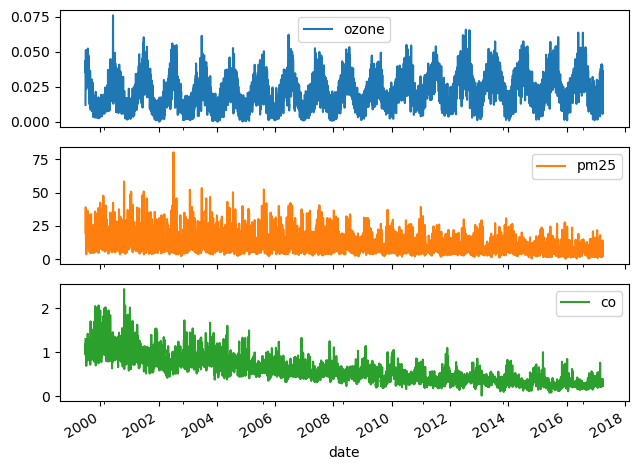

In [40]:
#---------EXCERCISE---------


data = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\air_quality_data\nyc.csv')

#Inspect data
#print(data.info())

#Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

#Set date column as index
data.set_index('date', inplace=True)

#Inspect data 
#print(data.info())

#Plot data
data.plot(subplots=True)
plt.tight_layout()
plt.show()

In [47]:
prices = pd.DataFrame()

for year in ['2014', '2015', '2016']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2014,2015,2016
0,556.00,NaN,NaN
1,551.95,524.81,NaN
2,NaN,NaN,NaN
3,NaN,NaN,741.84
4,558.10,513.87,742.58


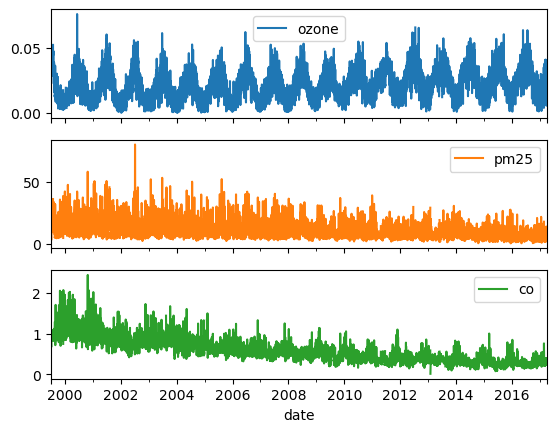

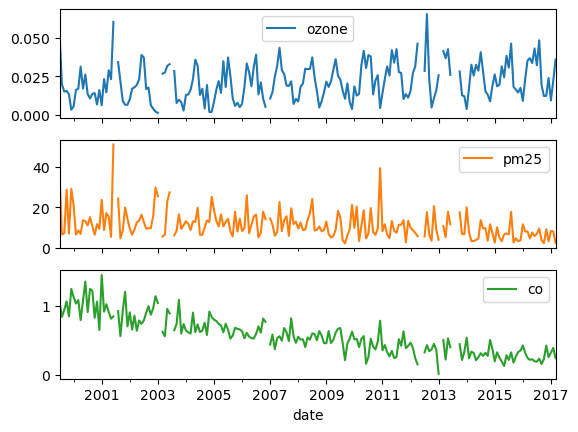

In [50]:

#---------EXCERCISE---------

#Set the frequency to calendar daily
co = data.asfreq('D')

#Plot the data
co.plot(subplots=True)
plt.show()


#Set frequency to monthly
co = data.asfreq('M')

#Plot the data
co.plot(subplots=True)
plt.show()

In [88]:
path = r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv'
google2 = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
google2.head(1)

,Close
Date,
2014-01-02,556.0


In [74]:
#shift attribute
#'periods' parameter

#google['shifted'] = google.Close.shift()
#google['lagged'] = google.Close.shift(periods=-1)
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86


In [93]:
#Financial Return
google['change'] = google.Close.div(google.shifted)
google['return'] = google.change.sub(1).mul(100)
google['diff'] = google.Close.diff()
google['pct_change'] = google.Close.pct_change().mul(100)
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google.head(6)


#Create daily_return
#google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

#Create monthly_return
#google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

#Create annual_return
#google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

,Close,shifted,lagged,change,return,diff,pct_change,return_3d
Date,,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,-0.728417
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970,3.063683


### 1.2 Basic Time Series Metrics & Resampling

#### Compare time series growth rates

1. Normalize price series to start at 100
2. Divide all prices by first in series, multiply by 100
    * Same starting point
    * All prices relative to starting point

In [7]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [11]:
first_price = google.Close[0]

normalized = google.Close.div(first_price).mul(100)
normalized.head()

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

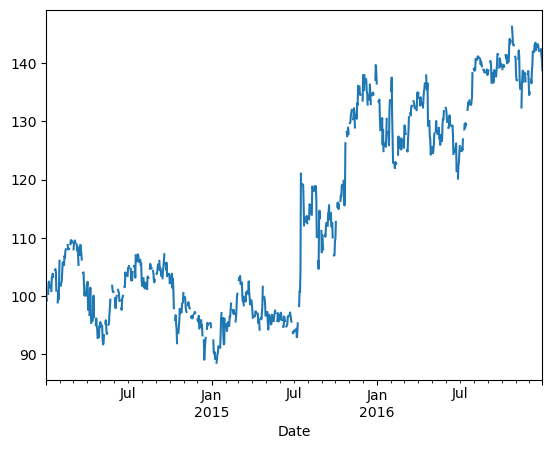

In [12]:
normalized.plot()

In [44]:
prices = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\apple_google.csv', parse_dates=['Date'], index_col='Date')
prices.head(1)

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06


In [45]:
index = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\sp500.csv', parse_dates=['date'], index_col='date')
index.head(1)


,SP500
date,
2007-06-29,1503.35


In [46]:
prices = pd.concat([prices, index], axis=1).dropna()
prices.head(3)

,AAPL,GOOG,SP500
2010-12-16,45.89,295.56,1242.87
2010-12-17,45.80,295.10,1243.91
2010-12-20,46.03,297.23,1247.08


<AxesSubplot:>

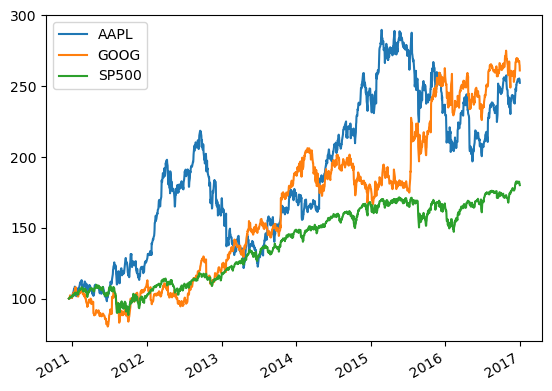

In [47]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.plot()

<AxesSubplot:>

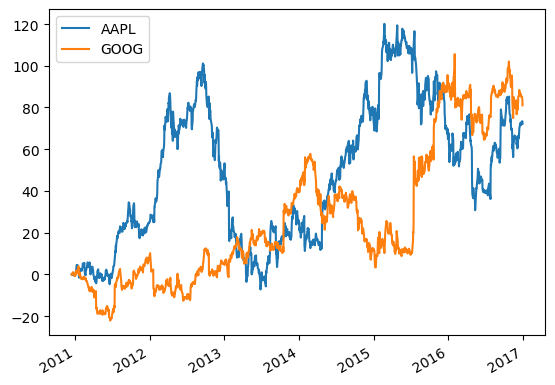

In [51]:
#Plottig performance difference

diff = normalized[['AAPL','GOOG']].sub(normalized['SP500'], axis=0)
diff.plot()

#### Changing frequency

Upsampling: Fill or interpolate missing data \
Downsampling: Aggregate existing data

* `asfreq()`,  `.reindex()`
* `.resample()` + transformation method

#monthly = quarterly.asfreq('M') \
#monthly = monthly.to_frame('baseline') 

#### Upsampling methods

```py
monthly['ffill'] = quarterly.asfreq('M', method='ffill') 
#ffill: Forward fill  
#bfill: Backward fill
monthly['ffill'] = quarterly.asfreq('M', fill_value=0)

Also used `quarterly.reindex(dates)` 
```


In [57]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series([1,2], index=monthly_dates)
# print(monthly)

# Create weekly_dates here
# weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
# print(monthly.reindex(weekly_dates))
# print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

#OR
#data.asfreq('W', method='bfill').head()

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


Now with resample, which is similar to groupby()

In [62]:
unrate = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\unrate.csv', parse_dates=['DATE'], index_col = 'DATE')
unrate.head()
#reporting first day of the month

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [68]:
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

In [66]:
unrate.resample('MS').asfreq()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
...,...
2016-09-01,4.9
2016-10-01,4.8
2016-11-01,4.6


In [88]:
gdp = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\gdp_growth.csv', parse_dates=['date'], index_col = 'date')
gdp.tail()

,gdp_growth
date,
2016-01-01,0.8
2016-04-01,1.4
2016-07-01,3.5
2016-10-01,2.1
2017-01-01,1.4


In [90]:
#gdp.resample('MS').ffill().add_sufix('_ffill')
gdp2 = gdp.resample('MS').interpolate().add_suffix('_inter')
gdp2.head()

#OR
#weekly['ffill'] = weekly.UNRATE.ffill()
#weekly['interpolated'] = weekly.UNRATE.interpolate()

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667


<AxesSubplot:>

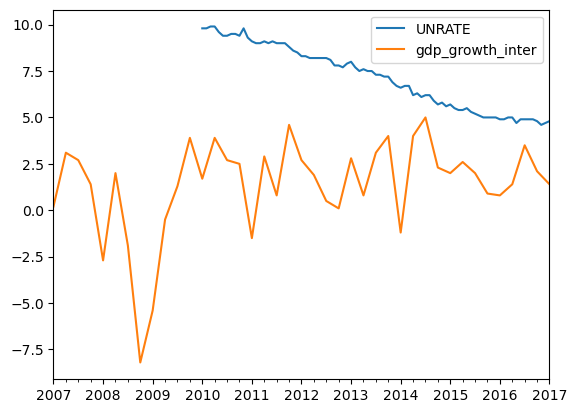

In [91]:
pd.concat([unrate, gdp2], axis=1).plot()

#### Downsampling methods

In [119]:
ozone = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\air_quality_data\ozone_nyc.csv', parse_dates=['date'], index_col = 'date')

In [101]:
ozone.resample('MS').mean().head()

,Ozone
date,
2000-01-01,0.010443
2000-02-01,0.011817
2000-03-01,0.016810
2000-04-01,0.019413
2000-05-01,0.026535


In [104]:
ozone.resample('MS').agg(['mean','std']).head(1)

Ozone          
                mean       std
date                          
2000-01-01  0.010443  0.004755

<AxesSubplot:xlabel='date'>

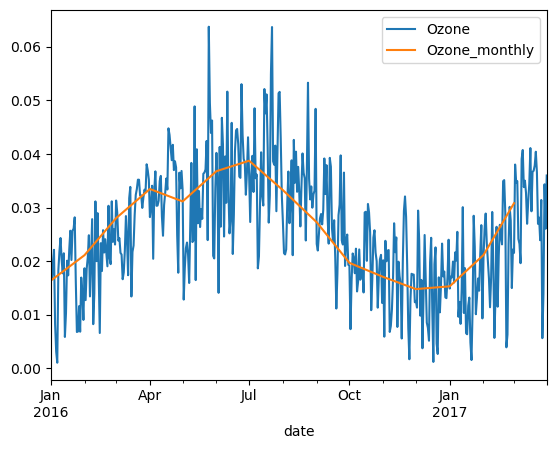

In [120]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

### 1.3 Window functions

There are two types of windows:
1. Rolling: Same size, sliding
2. Expanding: Contain all prior values

<AxesSubplot:xlabel='Date'>

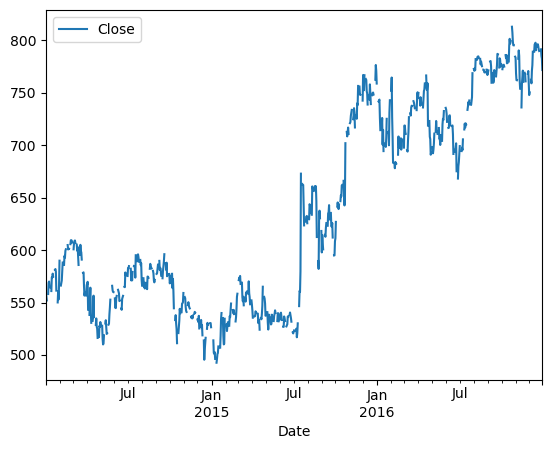

In [122]:
path = r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv'
google = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
google.plot()

In [135]:
pd.concat([google.head(10), google.rolling(window=2).mean().head(10), google.rolling(window='2D').mean().head(10)], axis=1)


,Close,Close,Close
Date,,,
2014-01-02,556.00,NaN,556.000
2014-01-03,551.95,553.975,553.975
2014-01-04,NaN,NaN,551.950
2014-01-05,NaN,NaN,NaN
2014-01-06,558.10,NaN,558.100
2014-01-07,568.86,563.480,563.480
2014-01-08,570.04,569.450,569.450
2014-01-09,564.55,567.295,567.295
2014-01-10,564.52,564.535,564.535


In [141]:
google.head(10).join(google.rolling(window='3D').mean().head(10).add_suffix('_joined'))

,Close,Close_joined
Date,,
2014-01-02,556.00,556.000000
2014-01-03,551.95,553.975000
2014-01-04,NaN,553.975000
2014-01-05,NaN,551.950000
2014-01-06,558.10,558.100000
2014-01-07,568.86,563.480000
2014-01-08,570.04,565.666667
2014-01-09,564.55,567.816667
2014-01-10,564.52,566.370000


<AxesSubplot:xlabel='Date'>

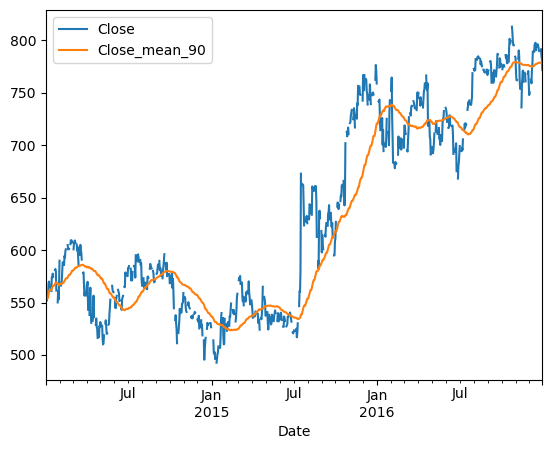

In [137]:
r90 = google.rolling(window='90D').mean()
google.join(r90.add_suffix('_mean_90')).plot()

In [150]:
google.Close.rolling('360D').median().to_frame('median').head(5)

,median
Date,
2014-01-02,556.000
2014-01-03,553.975
2014-01-04,553.975
2014-01-05,553.975
2014-01-06,556.000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1094 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


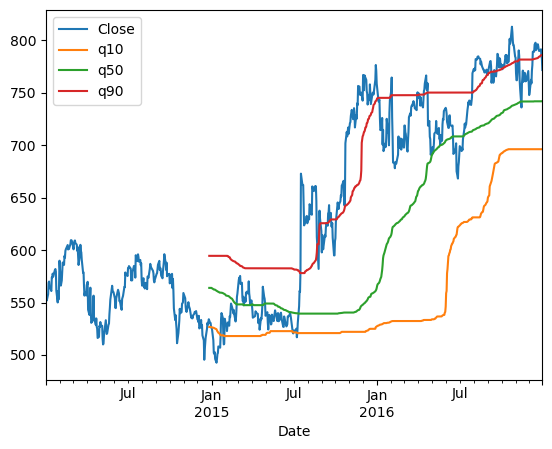

In [165]:
# Resample, interpolate and inspect ozone data here
data = google.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.Close.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()

In [168]:
data['2016':].head()

,Close,q10,q50,q90
Date,,,,
2016-01-01,754.62,527.542000,566.043333,744.818000
2016-01-02,750.36,527.802000,567.353333,744.970333
2016-01-03,746.10,527.829667,567.875000,745.248000
2016-01-04,741.84,528.118000,568.265000,745.248000
2016-01-05,742.58,528.285000,568.655000,745.248000
